In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns 
import time
import datetime
import torchvision
import torch
import random
from sklearn.model_selection import train_test_split
from skimage import io
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms as tfs
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader,SubsetRandomSampler
from PIL import Image
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torchsummary import summary
import os
import torchvision.models as models

In [3]:
%cd "/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/feature extract"

/content/drive/.shortcut-targets-by-id/1ujc0rEwHZPLX-PmA8l7W_lrmuFS-3EZr/Final/New_Final_Cross_Race_Effect/feature extract


In [4]:
# Try this if above does not work
%cd "/content/drive/MyDrive/JHU courses/ML_class/Final/New_Final_Cross_Race_Effect/feature extract"

[Errno 2] No such file or directory: '/content/drive/MyDrive/JHU courses/ML_class/Final/New_Final_Cross_Race_Effect/feature extract'
/content/drive/.shortcut-targets-by-id/1ujc0rEwHZPLX-PmA8l7W_lrmuFS-3EZr/Final/New_Final_Cross_Race_Effect/feature extract


In [5]:
%ls

'old version'/


In [6]:
len(range(0,10))

10

In [48]:
def GetFeature( img_path, input_image_race, input_age_range,start_layer_number, end_layer_number):
  '''
  model_path : the path of your model
  img_path: image path you want to test
  start_layer_number: which conv layer you want to see
  end_layer_number: the end layer number you choose 
  output_file_name: what name you want to output(EX: race3_race0_0_10)
  '''
  race_name = ('race0','race1','race2','race3')
  model_name = ('resnet','vgg')
  for race_c in race_name:
    for model_c in model_name:
      if race_c == "race0" and model_c =='resnet':
        path = r"/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_0_checkpts/resnet101_race_0_age_best.pt"
      elif race_c == "race0" and model_c =='vgg':
        path = r'/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_0_checkpts/VGG16_race_0_age_best.pt'
      elif race_c == "race1" and model_c =='resnet':
        path = r'/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_1_checkpts/resnet101_race_1_age_best_harry.pt'
      elif race_c == 'race1'and model_c == 'vgg':
        path = r'/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_1_checkpts/VGG16_race_1_age_best.pt'
      elif race_c == 'race2' and model_c == 'resnet':
        path = r'/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_2_checkpts/resnet101_race_2_age_best.pt'
      elif race_c == 'race2' and model_c == 'vgg':
        path = r'/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_2_checkpts/VGG16_race_2_age_best.pt'
      elif race_c == 'race3' and model_c == 'resnet':
        path = r'/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_3_checkpts/resnet101_race_3_age_best.pt'
      elif race_c == 'race3' and model_c == 'vgg':
        path = r'/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_3_checkpts/VGG16_race_3_age_best.pt'

      #path = model_path
      model_load = torch.load(path)
      model = models.resnet101()
      optimizer = optim.SGD
      if os.path.isfile(path):
          loc = 'cuda:{}'.format(0)
          checkpoint = torch.load(path, map_location=loc)
          start_epoch = checkpoint['epoch']
          model.load_state_dict(checkpoint['model_state_dict'], strict=False)
      model.eval()
      device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
      image = Image.open(img_path)
      img_transform = transforms.Compose([
              transforms.Resize((224,224)),
              transforms.PILToTensor(),
      ])
      image = img_transform(image)
      image = image.unsqueeze(0)
      # image = image.to(device)
      image = image.float()
      model_weights =[]
      conv_layers = []
      model_factor = list(model.children())
      num = 0
      for i in range(len(model_factor)):
          if type(model_factor[i]) == nn.Conv2d:
              num+=1
              model_weights.append(model_factor[i].weight)
              conv_layers.append(model_factor[i])
          elif type(model_factor[i]) == nn.Sequential:
              for j in range(len(model_factor[i])):
                  for child in model_factor[i][j].children():
                      if type(child) == nn.Conv2d:
                          num+=1
                          model_weights.append(child.weight)
                          conv_layers.append(child)
      outputs = []
      names = []
      for layer in conv_layers[0:]:
          image = layer(image)
          outputs.append(image)
          names.append(str(layer))
      progress = []
      for feature_map in outputs:
          feature_map = feature_map.squeeze(0)
          gray_scale_image = torch.sum(feature_map,0)
          gray_scale_image = gray_scale_image / feature_map.shape[0]
          progress.append(gray_scale_image.data.cpu().numpy())
      fig = plt.figure(figsize=(20,40))
      for i in range(start_layer_number,end_layer_number):
        a = fig.add_subplot(2, 5, i)
        a.axis("off")
        a.set_title(names[i].split('(')[0], fontsize=30)
        #plt.savefig(str(output_file_name))
        imgplot = plt.imshow(progress[i],cmap ='gray')
      fig = imgplot
      output_file_name = f'{race_c}_race{input_image_race}_{model_c}_{input_age_range}'
      plt.savefig(output_file_name)
  return imgplot

In [74]:
img_path = r'/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/Picked_Image/Cropped /8_1_2_20161219190656899.jpg.chip.jpg'

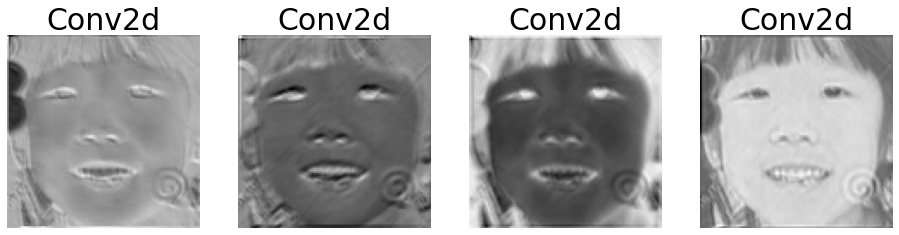

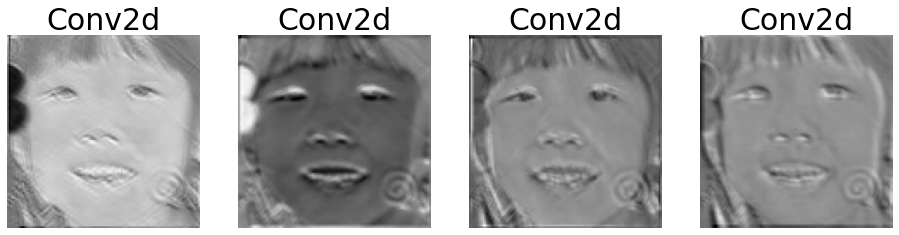

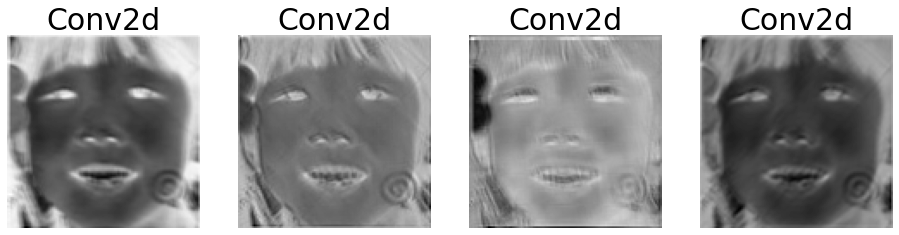

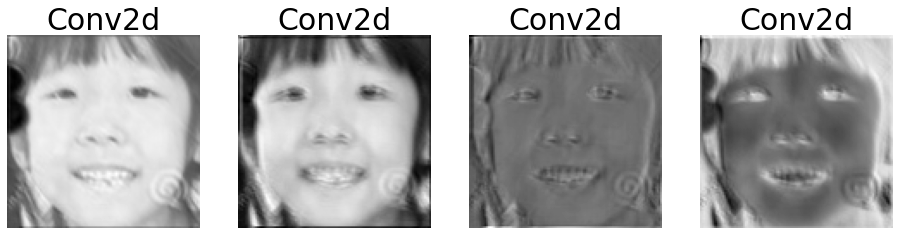

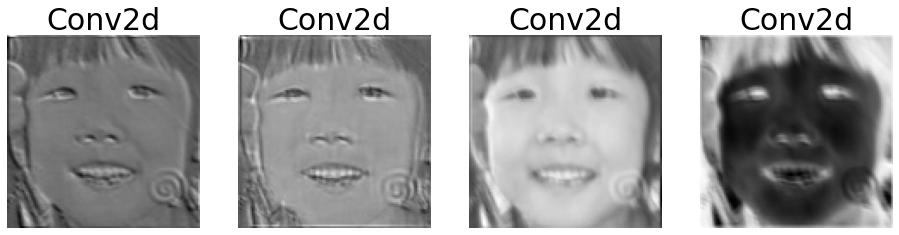

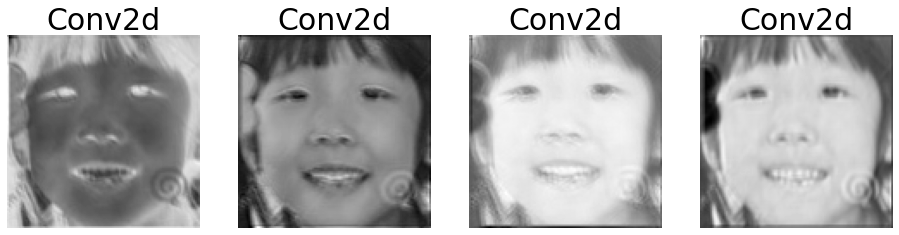

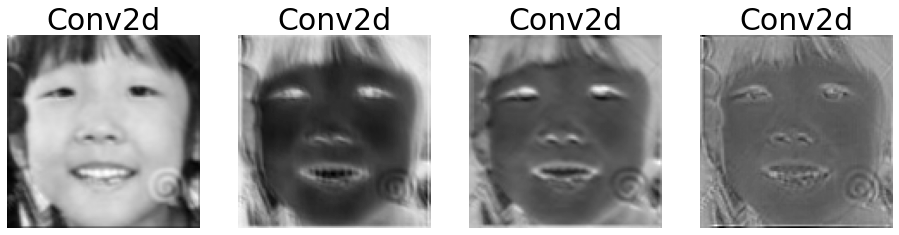

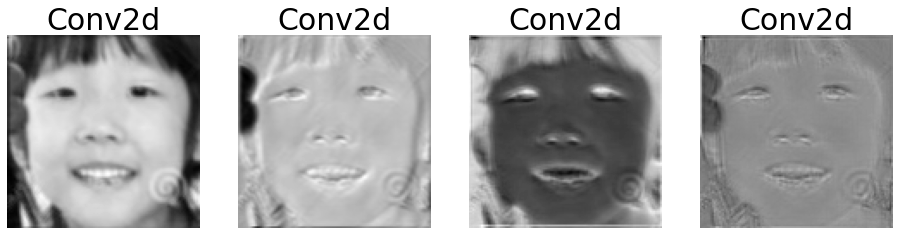

In [75]:
GetFeature(img_path,2,0,1,5)

In [ ]:
# outputs = []
# names = []
# for layer in conv_layers[0:]:
#     image = layer(image)
#     outputs.append(image)
#     names.append(str(layer))
# print(len(outputs))
# #print feature_maps
# # for feature_map in outputs:
# #   print(feature_map.shape)

In [ ]:
# processed = []
# for feature_map in outputs:
#     feature_map = feature_map.squeeze(0)
#     gray_scale = torch.sum(feature_map,0)
#     gray_scale = gray_scale / feature_map.shape[0]
#     processed.append(gray_scale.data.cpu().numpy())
# # for fm in processed:
# #     print(fm.shape)

In [ ]:
# fig = plt.figure(figsize=(30, 50))
# for i in range(10):
#     a = fig.add_subplot(3, 4, i+1)
#     imgplot = plt.imshow(processed[i],cmap ='gray')
#     a.axis("off")
#     a.set_title(names[i].split('(')[0], fontsize=30)
# plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')

In [ ]:
# # Get images for each race
# import os
# from os.path import isfile, join

# crop_path = "../../Dataset/UTKFace/"

# crop_list = [f for f in os.listdir(crop_path) if isfile(join(crop_path,f)) and f.endswith(".jpg")]

In [ ]:
# import pandas as pd 

# age_list = []
# gender_list = []
# race_list = []

# for crop_img_name in crop_list:
  
#   img_name = crop_img_name.split("_")

#   age_list.append(int(img_name[0]))
#   gender_list.append(img_name[1])
#   race_list.append(img_name[2])

# df = pd.DataFrame({
#     "img":crop_list,
#     "age":age_list,
#     "gender":gender_list,
#     "race":race_list
# })

# df

img  age gender race
0       1_0_0_20161219225850912.jpg.chip.jpg    1      0    0
1       1_0_0_20170109192948605.jpg.chip.jpg    1      0    0
2      56_0_3_20170119180916188.jpg.chip.jpg   56      0    3
3      56_0_3_20170119183551541.jpg.chip.jpg   56      0    3
4      56_0_2_20170119180737540.jpg.chip.jpg   56      0    2
...                                      ...  ...    ...  ...
23703   1_0_2_20161219202914180.jpg.chip.jpg    1      0    2
23704   1_1_0_20161219202919508.jpg.chip.jpg    1      1    0
23705   2_1_2_20161219202825380.jpg.chip.jpg    2      1    2
23706   5_0_2_20161219202809316.jpg.chip.jpg    5      0    2
23707   1_0_2_20161219202752764.jpg.chip.jpg    1      0    2

[23708 rows x 4 columns]

In [ ]:
# age_range_list = []

# for age in df["age"]:
#   if(int(age)>=0 and int(age) < 10):
#       # set 0-10 as class 0
#       age_range_list.append(0)
#   elif(int(age)>=10 and int(age) < 20):
#       # set 10-20 as class 1
#       age_range_list.append(1)
#   elif(int(age)>=20 and int(age) < 30):
#       # set 20-30 as class 2
#       age_range_list.append(2)
#   elif(int(age)>=30 and int(age) < 40):
#       # set 30-40 as class 3
#       age_range_list.append(3)
#   elif(int(age)>=40 and int(age) < 50):
#       # set 40-50 as class 4
#       age_range_list.append(4)
#   elif(int(age)>=50 and int(age) < 60):
#       # set 50-60 as class 5
#       age_range_list.append(5)
#   elif(int(age) >= 60):
#       # set 60> as class 5
#       age_range_list.append(6)

# df["age_range"] = age_range_list
# df

img  age gender race  age_range
0       1_0_0_20161219225850912.jpg.chip.jpg    1      0    0          0
1       1_0_0_20170109192948605.jpg.chip.jpg    1      0    0          0
2      56_0_3_20170119180916188.jpg.chip.jpg   56      0    3          5
3      56_0_3_20170119183551541.jpg.chip.jpg   56      0    3          5
4      56_0_2_20170119180737540.jpg.chip.jpg   56      0    2          5
...                                      ...  ...    ...  ...        ...
23703   1_0_2_20161219202914180.jpg.chip.jpg    1      0    2          0
23704   1_1_0_20161219202919508.jpg.chip.jpg    1      1    0          0
23705   2_1_2_20161219202825380.jpg.chip.jpg    2      1    2          0
23706   5_0_2_20161219202809316.jpg.chip.jpg    5      0    2          0
23707   1_0_2_20161219202752764.jpg.chip.jpg    1      0    2          0

[23708 rows x 5 columns]

In [ ]:
# # Images for race 0

# def getImages(race, age_ranges):
#   df_race = df[df.race == race]
#   names = []
#   for age_range in age_ranges:
#     df_age_range = df_race[df_race.age_range == age_range]

#     rows = np.random.choice(df_age_range.index.values, 1)
#     sampled_df = df_age_range.loc[rows]
#     #print(sampled_df)
#     race_image = sampled_df.iloc[0].img
#     names.append((race_image, sampled_df.iloc[0].age_range, sampled_df.iloc[0].race))
#   return names

# def getAgeRange(age_range):
#   if age_range == 0:
#       # set 0-10 as class 0
#       return "0-10"
#   elif age_range == 1:
#       # set 10-20 as class 1
#       return "10-20"
#   elif age_range == 2:
#       # set 20-30 as class 2
#       return "20-30"
#   elif age_range == 3:
#       # set 30-40 as class 3
#       return "30-40"
#   elif age_range == 4:
#       # set 40-50 as class 4
#       return "40-50"
#   elif age_range == 5:
#       # set 50-60 as class 5
#       return "50-60"
#   elif age_range == 6:
#       # set 60> as class 5
#       return "60+"

# def createVisualization(img_name, race, age_range, model):
#   img_path = os.path.join("../../Dataset/UTKFace/", img_name)
#   model_path = ""
#   if race == "1" and model == "resnet101":
#     model_path = f"../race_{race}_checkpts/{model}_race_{race}_age_best_harry.pt"
#   else:
#     model_path = f"../race_{race}_checkpts/{model}_race_{race}_age_best.pt"

#   age_range_str = getAgeRange(age_range)
#   output_file_name = f"race{race}_{age_range_str}_{model}"
#   GetFeature(model_path ,img_path, output_file_name, 0, 10)

# def createVisualizationForImages(imgs, model):
#   for img in imgs:
#     img_name = img[0]
#     race = img[2]
#     age_range = img[1]
#     createVisualization(img_name, race, age_range, model)


In [ ]:
# # Images for race 0
# race0_imgs = getImages("0", [0, 2, 4, 6])
# createVisualizationForImages(race0_imgs, "VGG16")
# createVisualizationForImages(race0_imgs, "resnet101")

[('6_1_1_20170114031419410.jpg.chip.jpg', 0, '1'), ('26_0_1_20170116024208336.jpg.chip.jpg', 2, '1'), ('40_1_1_20170112231614270.jpg.chip.jpg', 4, '1'), ('68_0_1_20170111224026548.jpg.chip.jpg', 6, '1')]


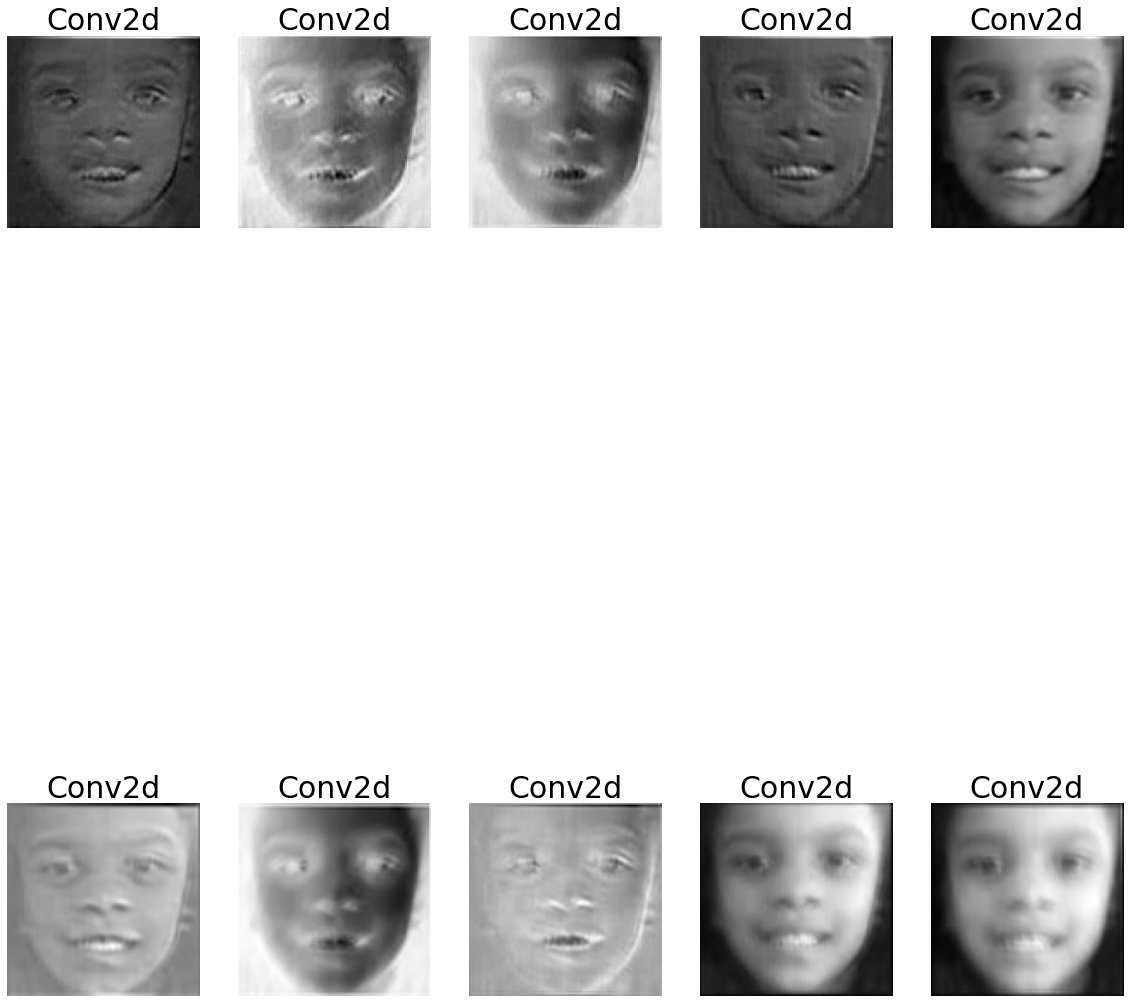

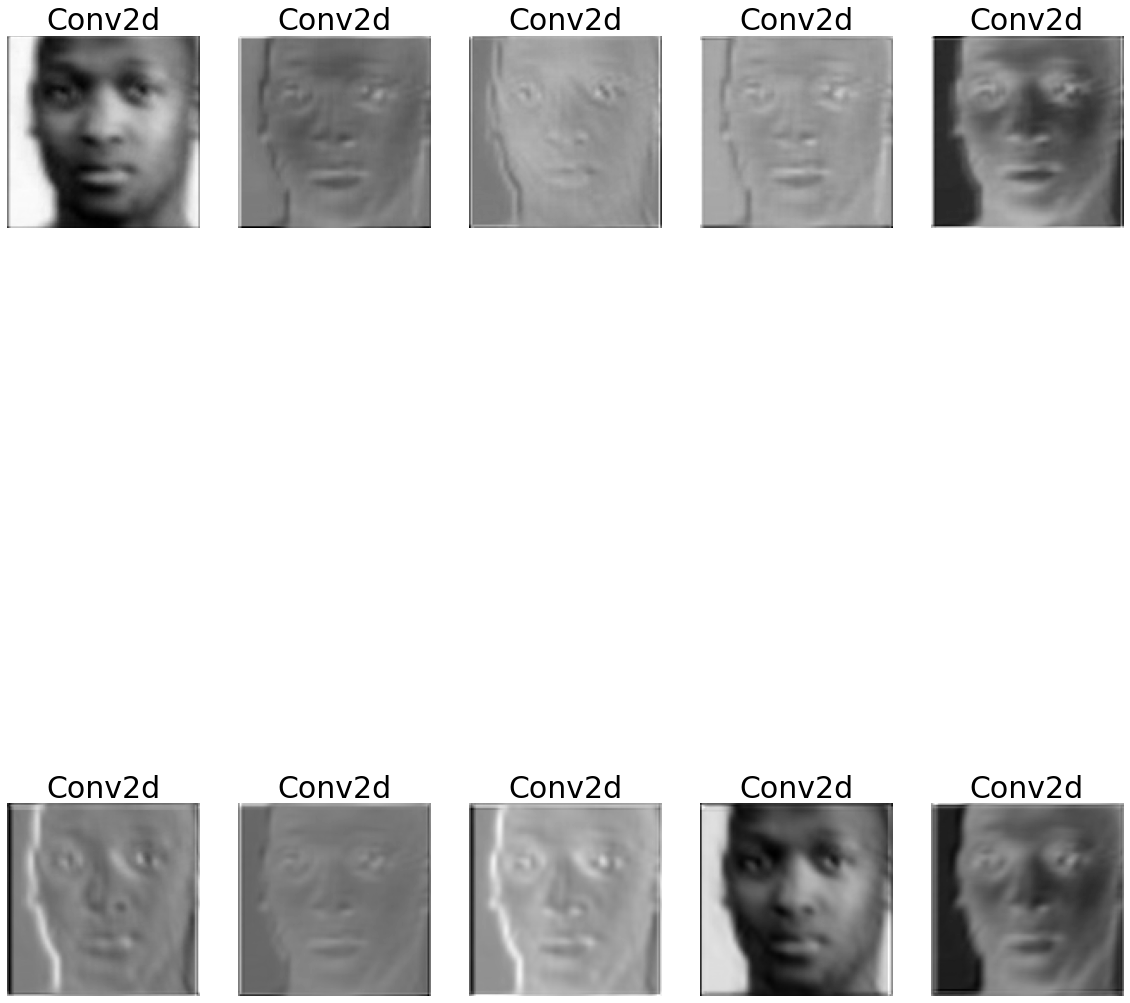

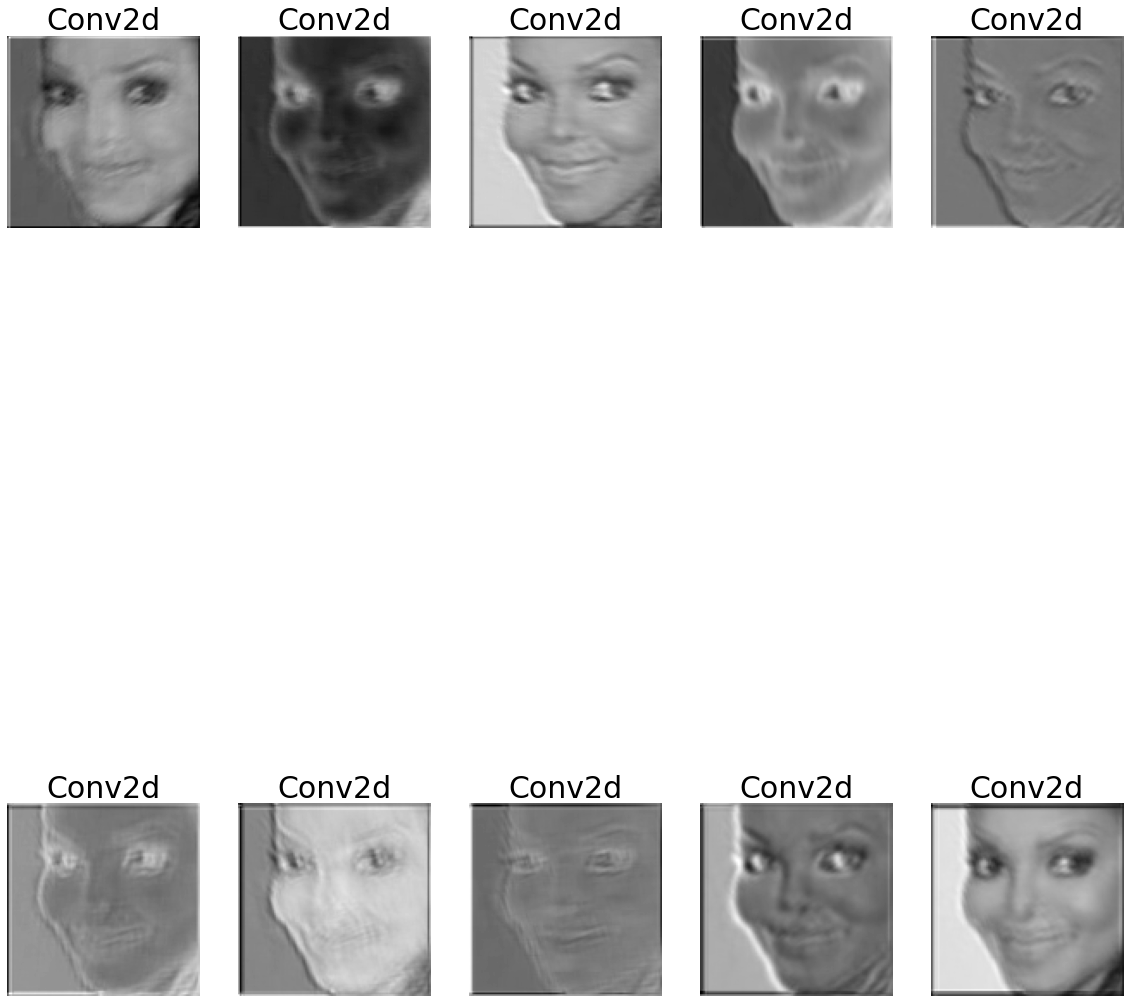

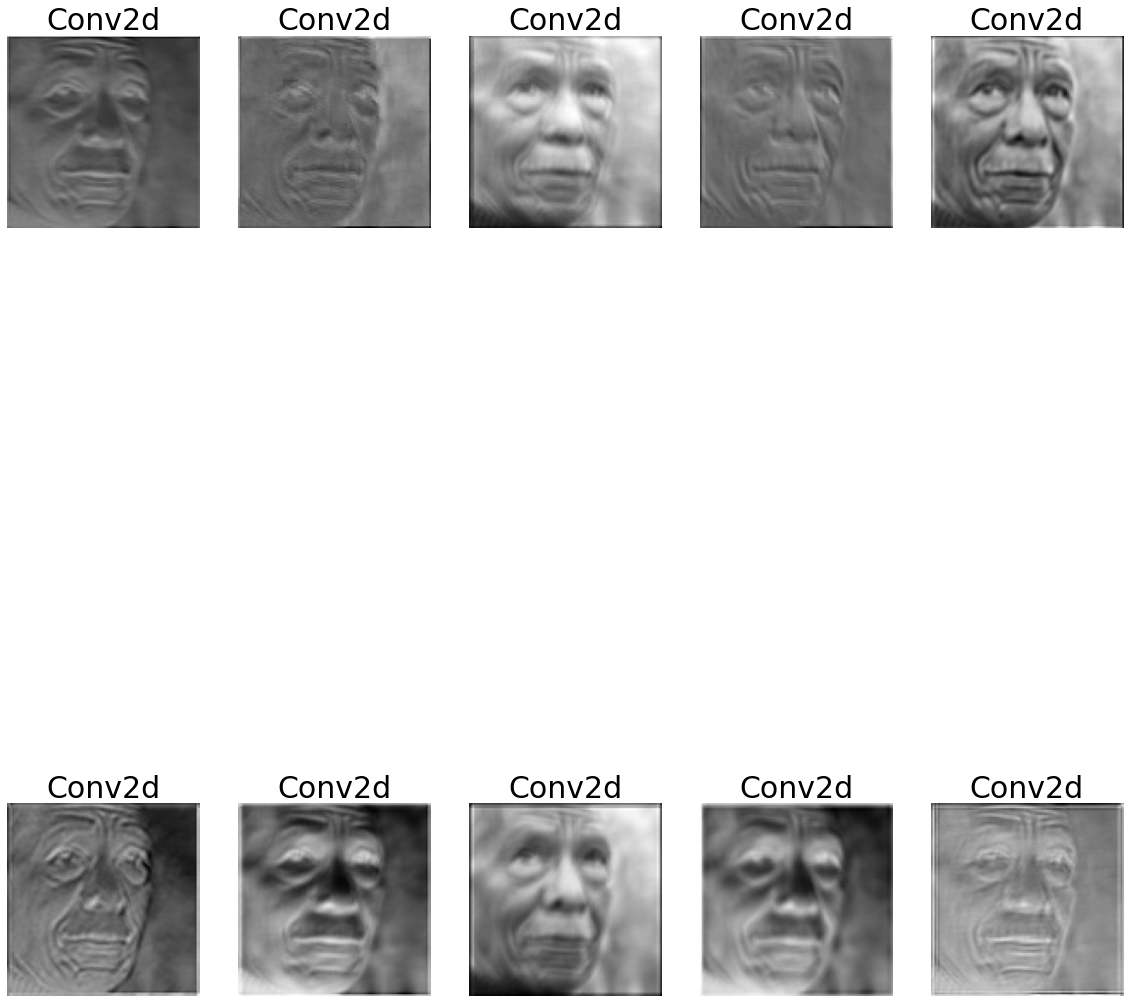

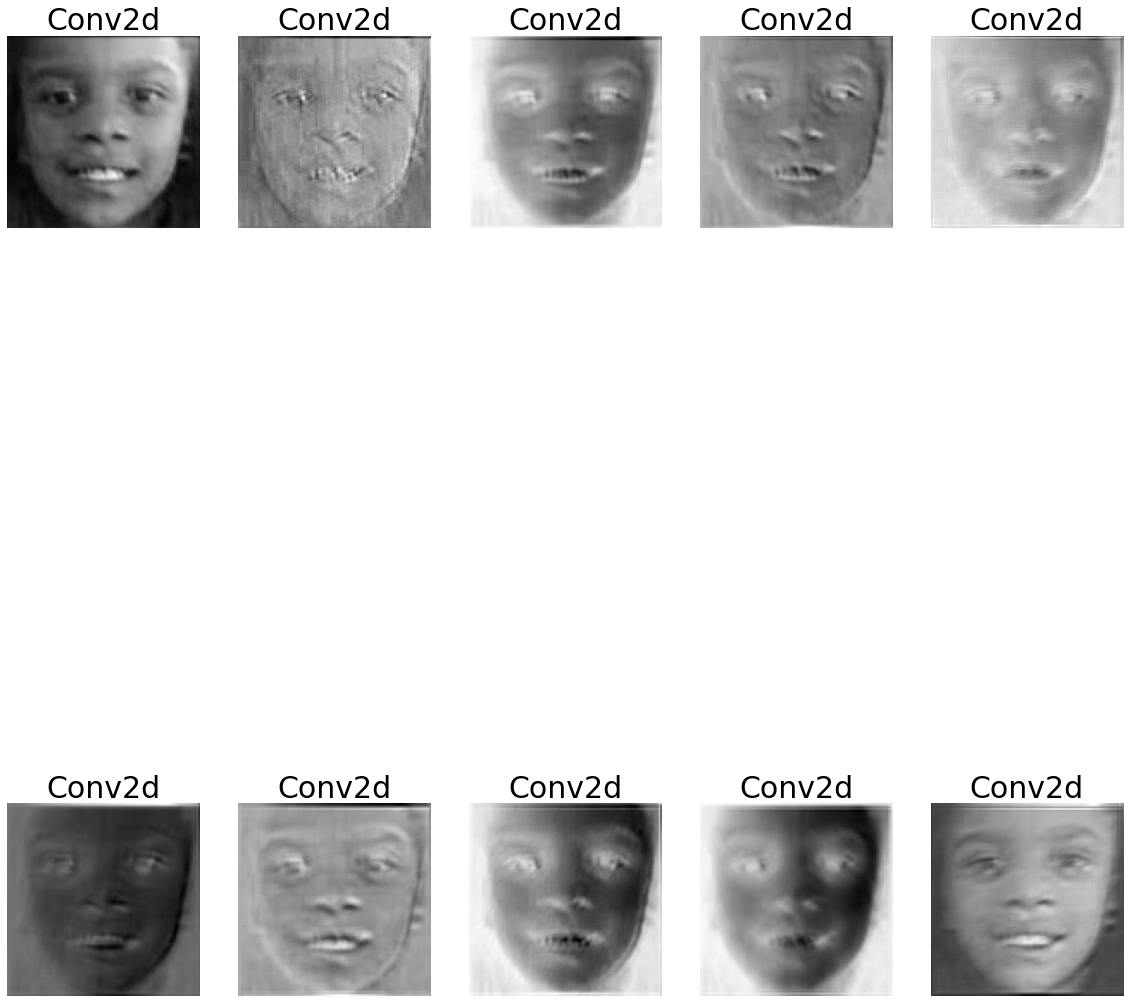

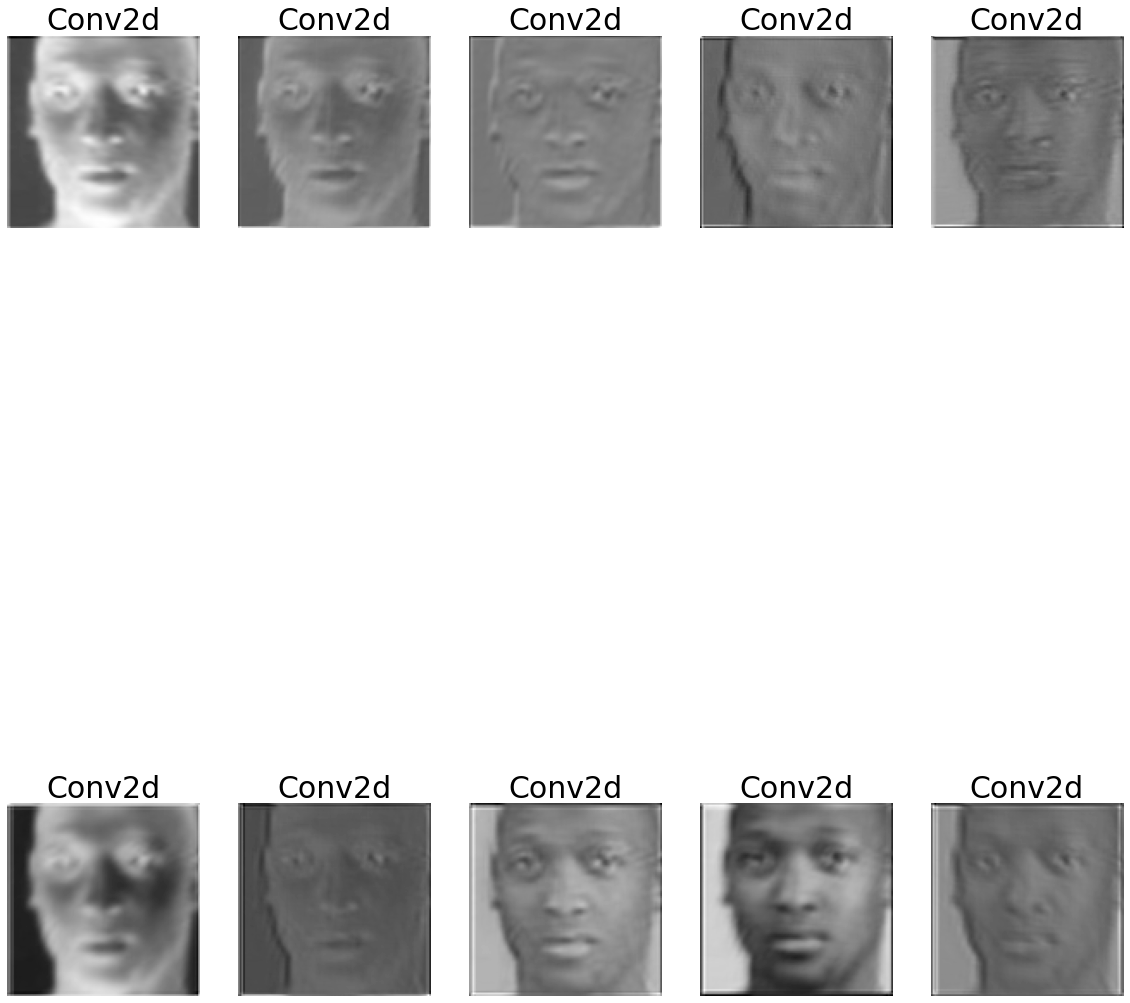

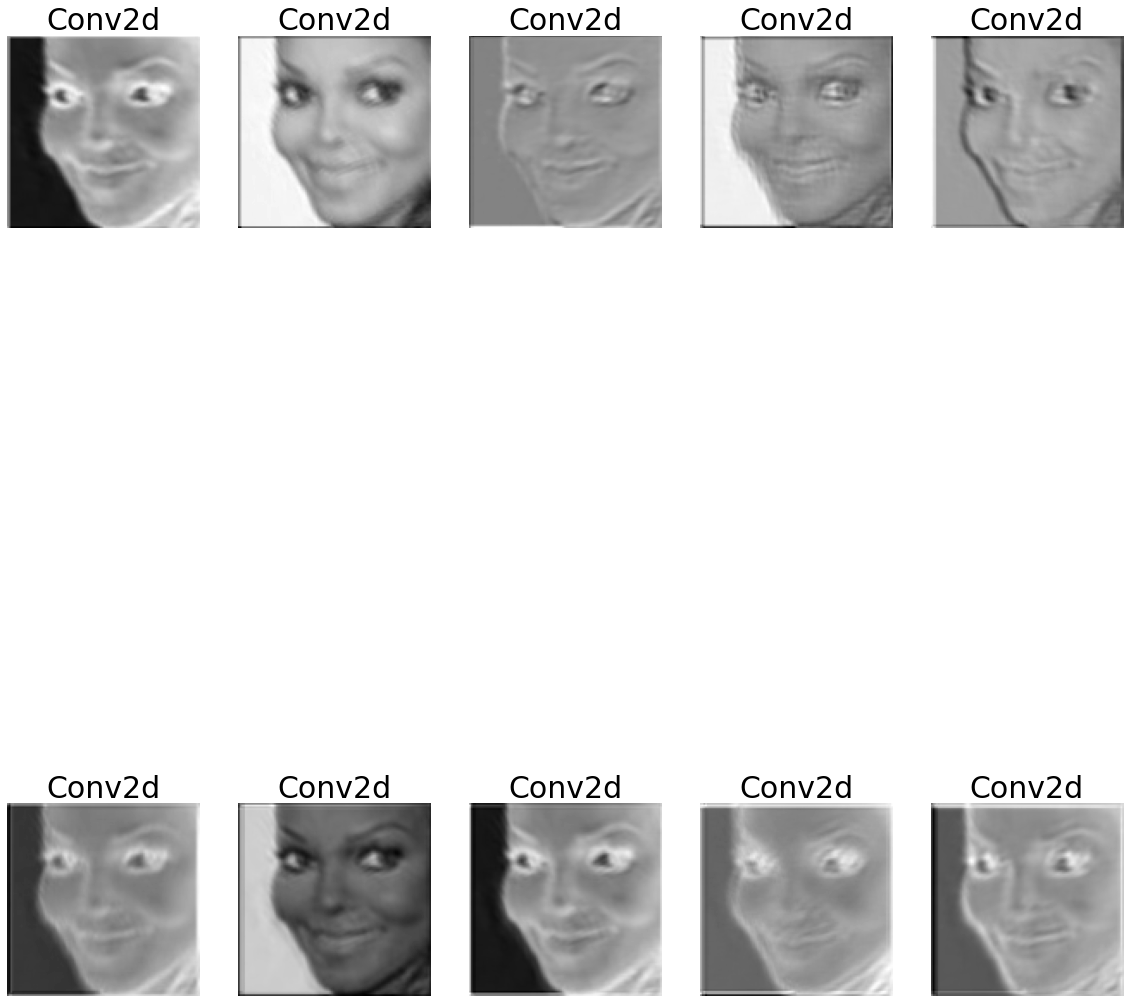

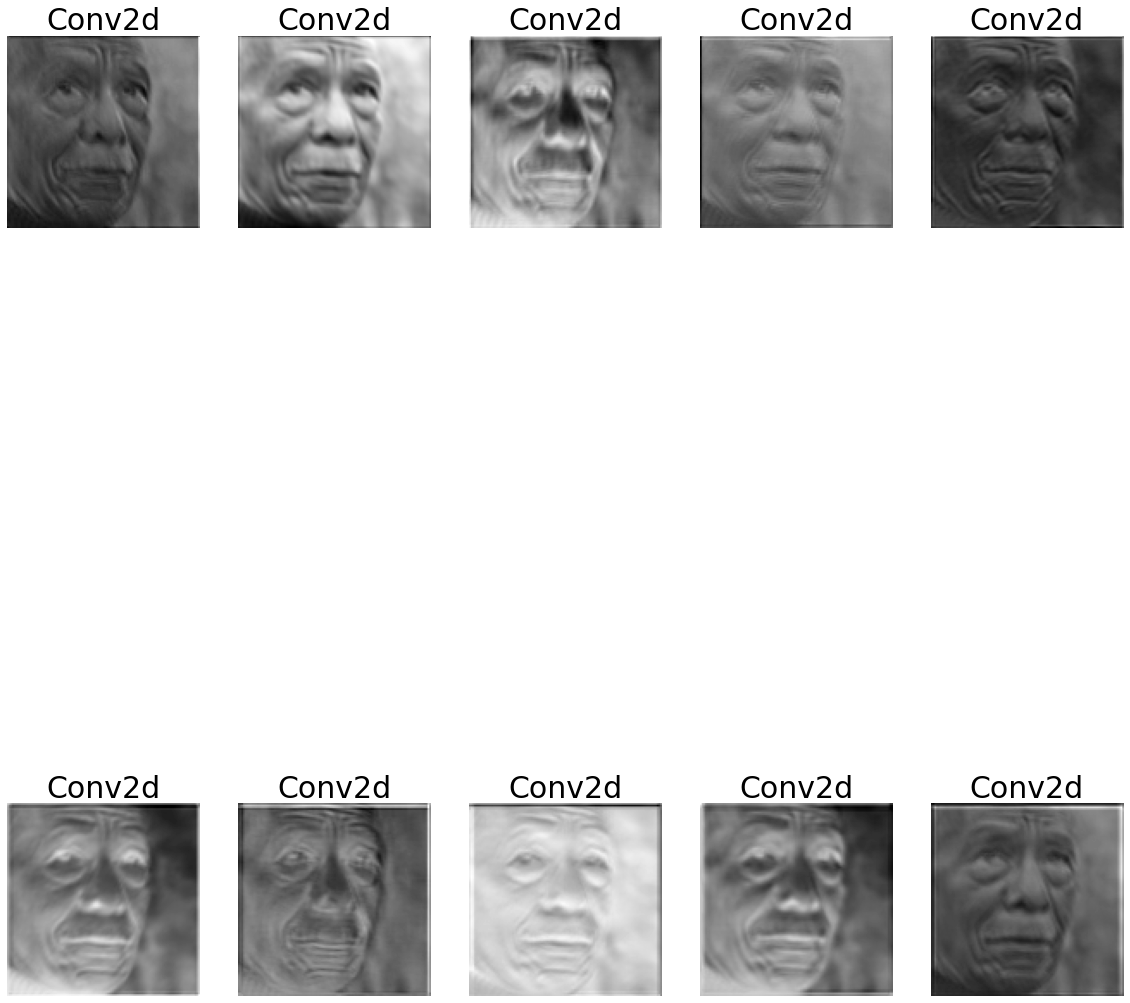

In [ ]:
# # Images for race 1
# race0_imgs = getImages("1", [0, 2, 4, 6])
# print(race0_imgs)
# createVisualizationForImages(race0_imgs, "VGG16")
# createVisualizationForImages(race0_imgs, "resnet101")

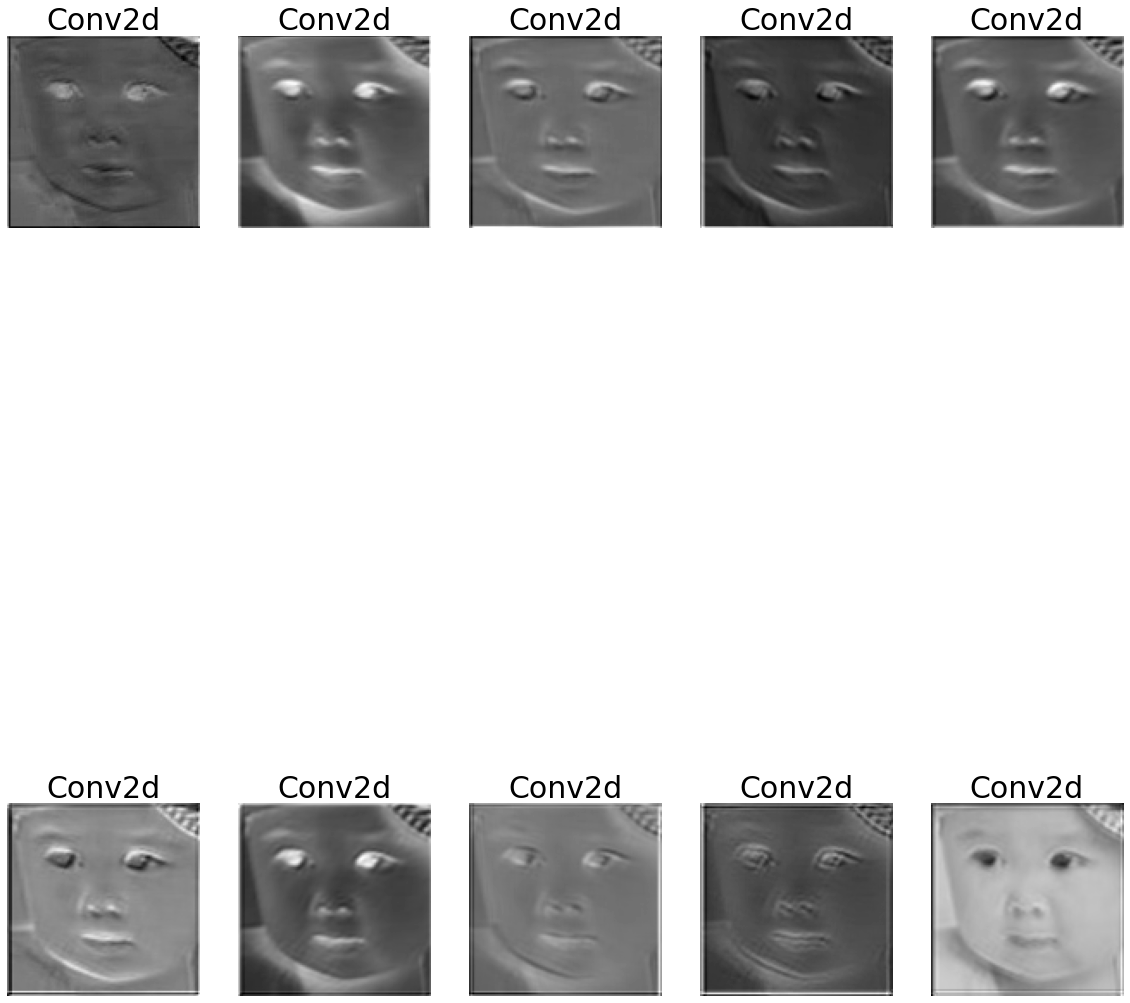

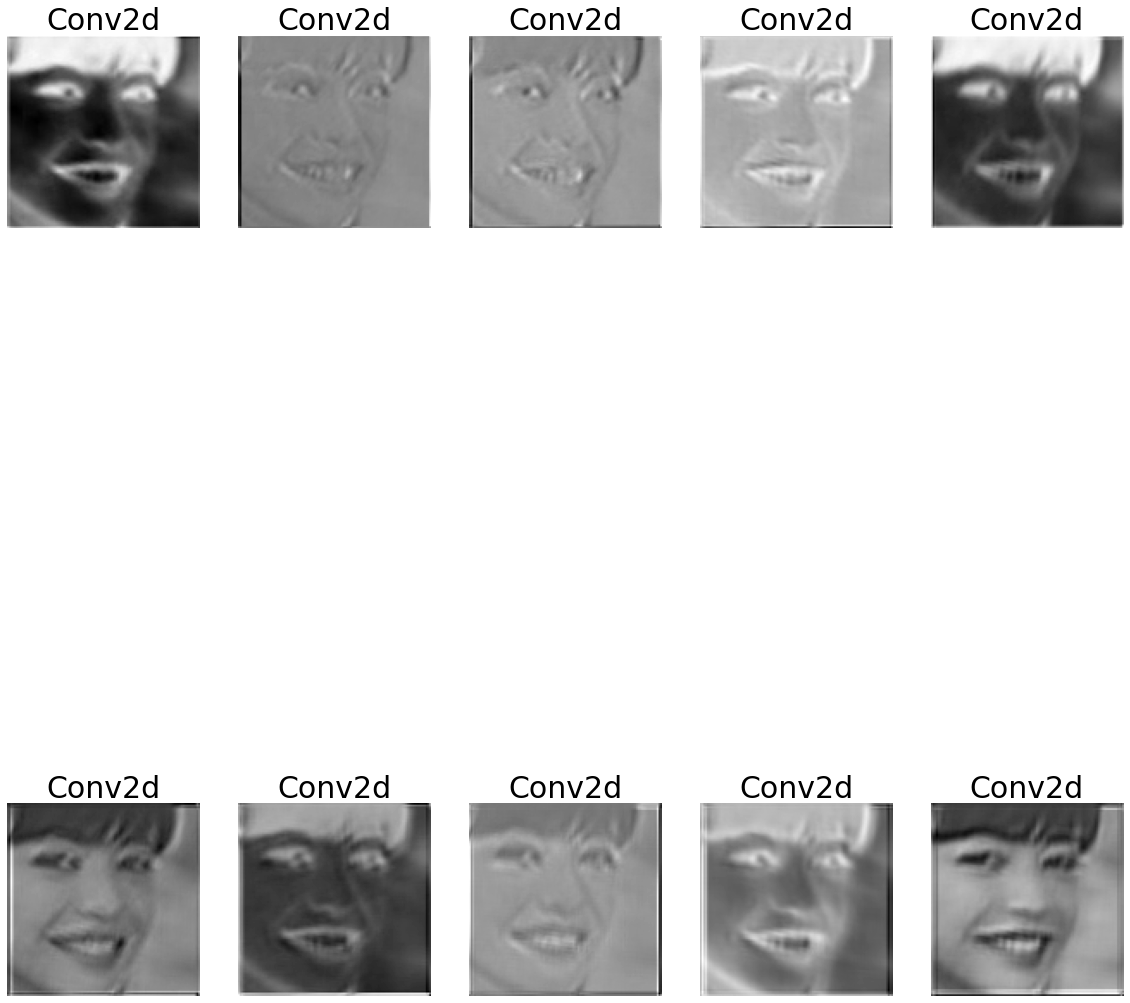

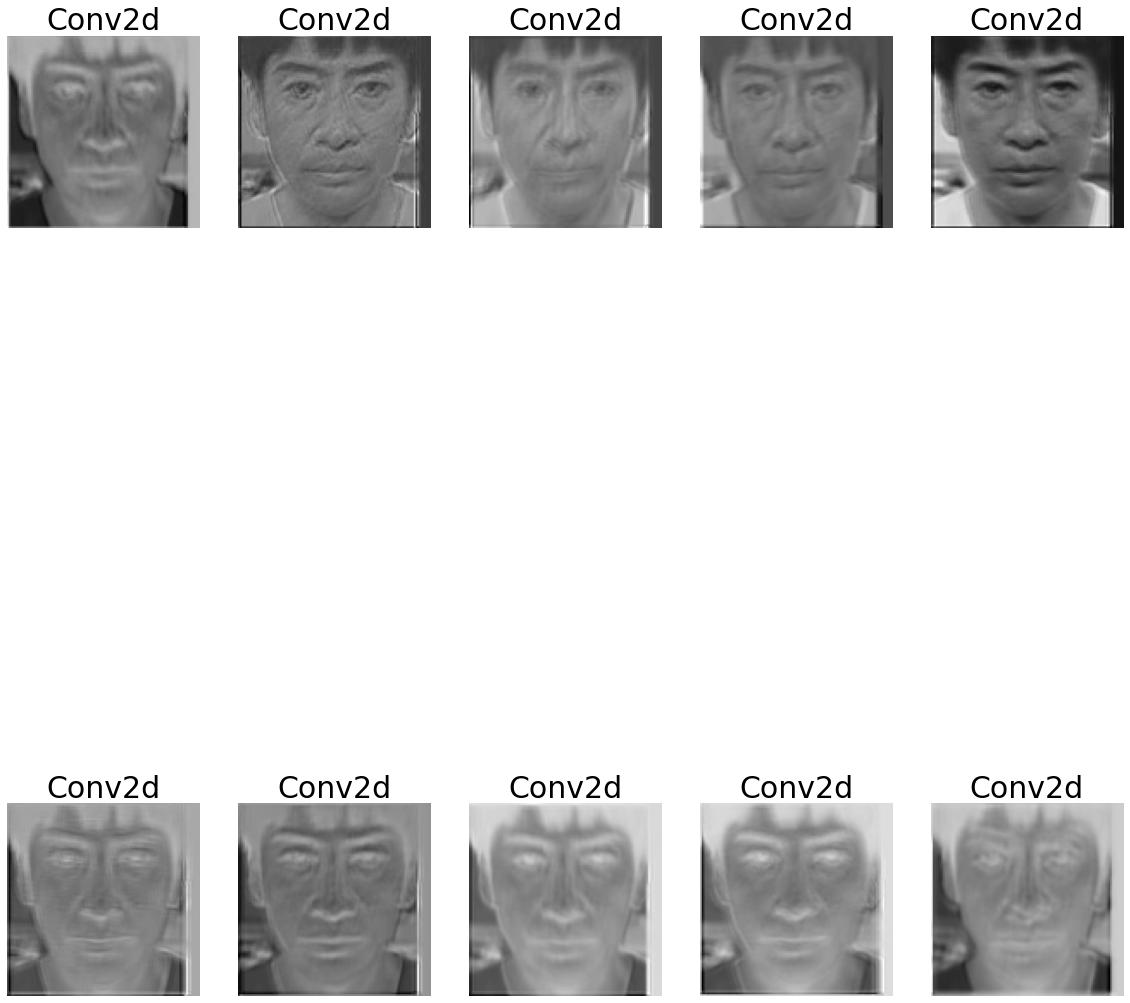

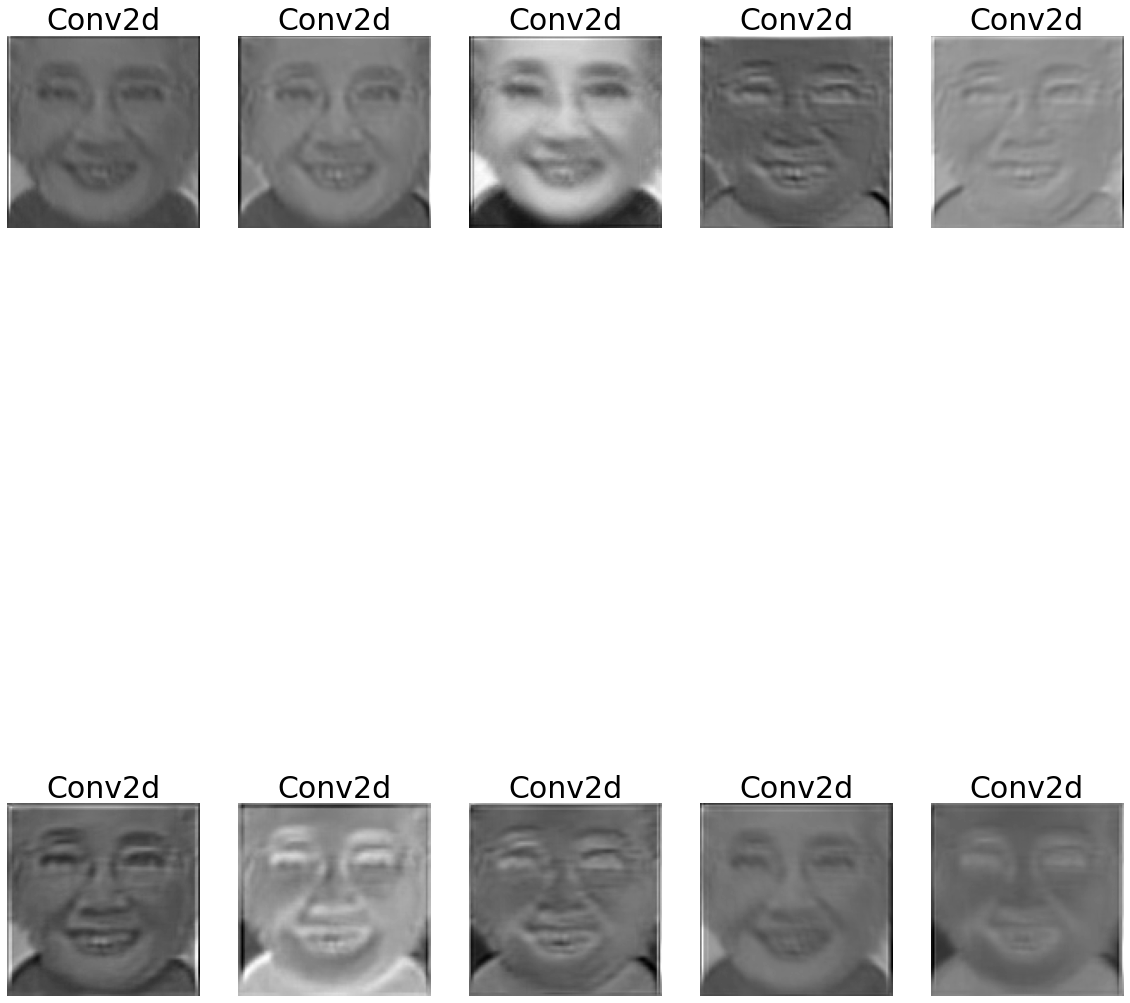

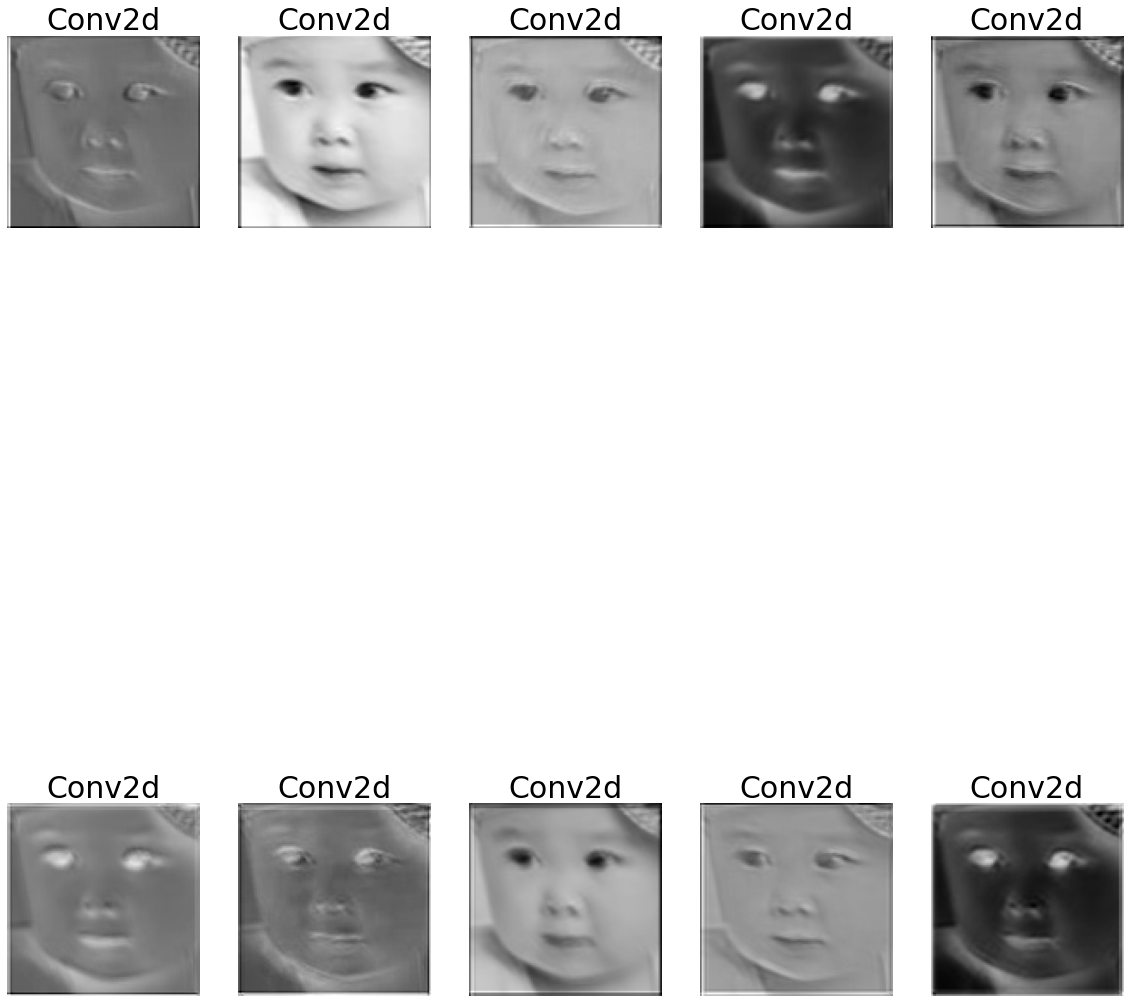

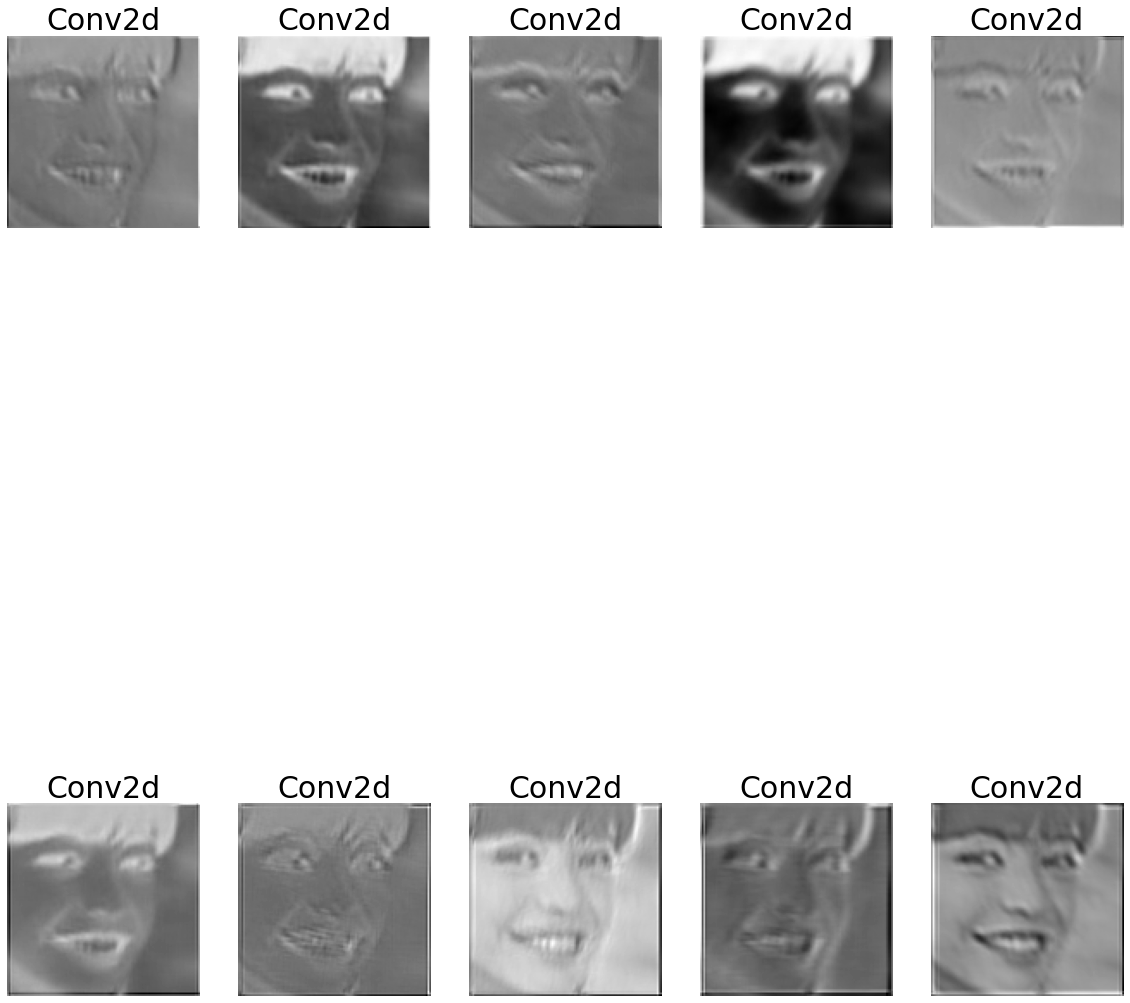

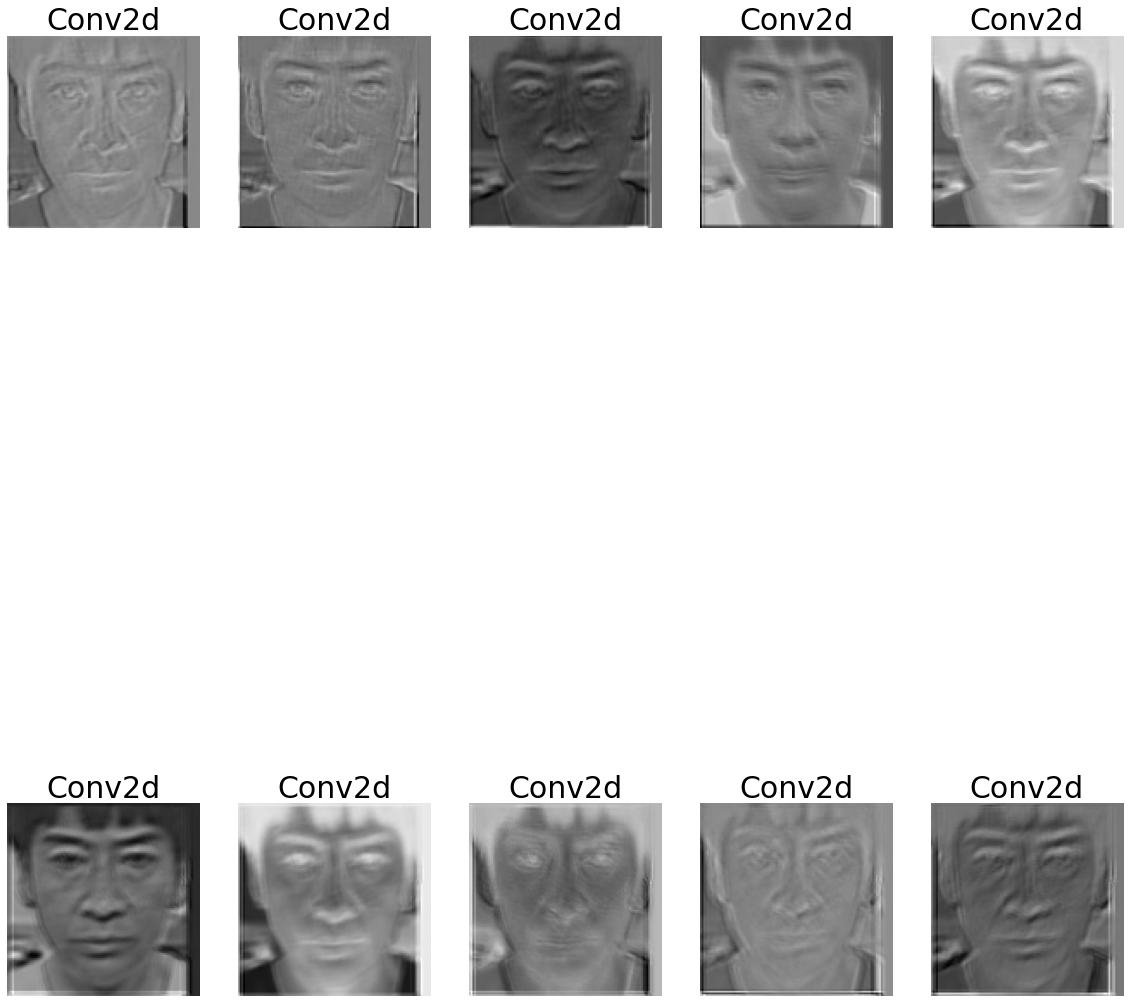

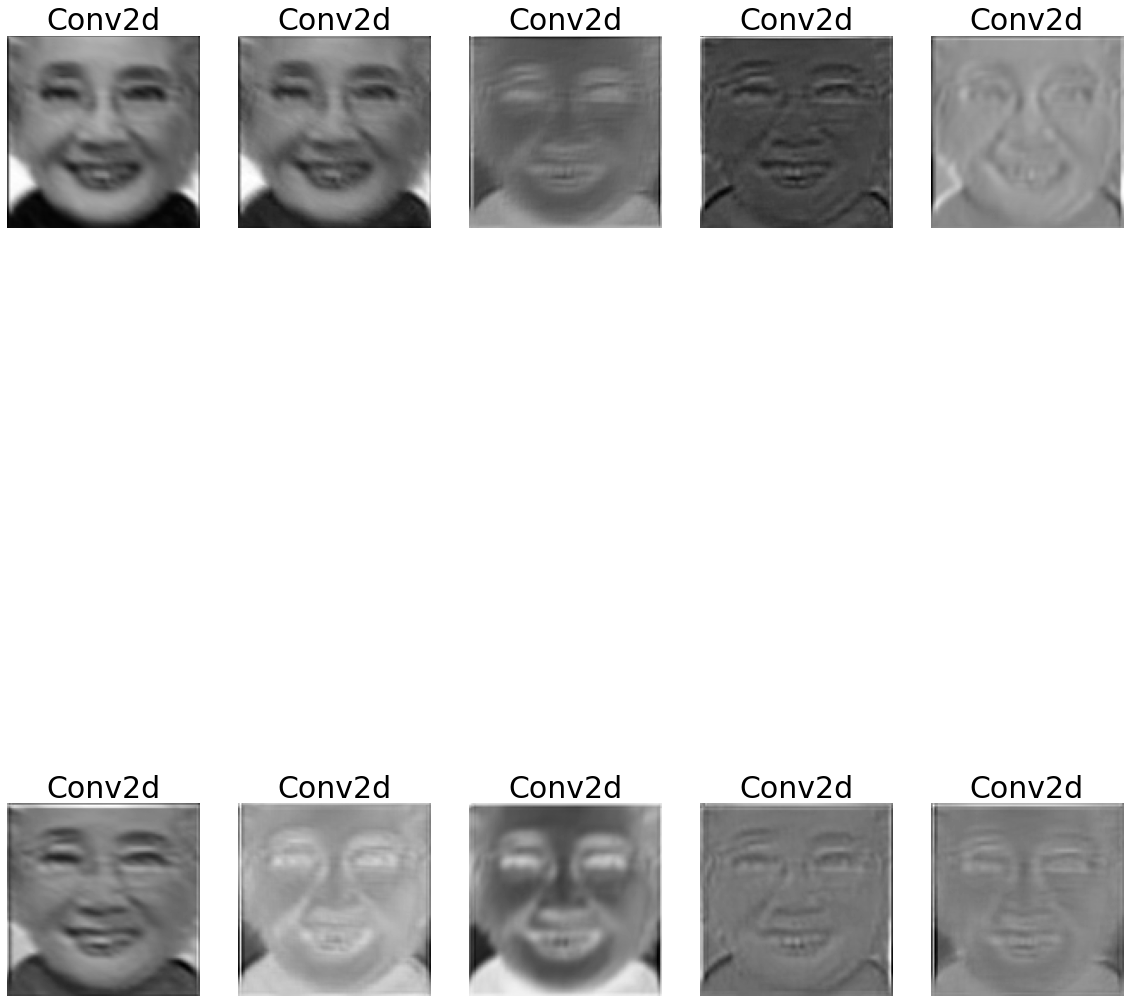

In [ ]:
# Images for race 2
race0_imgs = getImages("2", [0, 2, 4, 6])
createVisualizationForImages(race0_imgs, "VGG16")
createVisualizationForImages(race0_imgs, "resnet101")

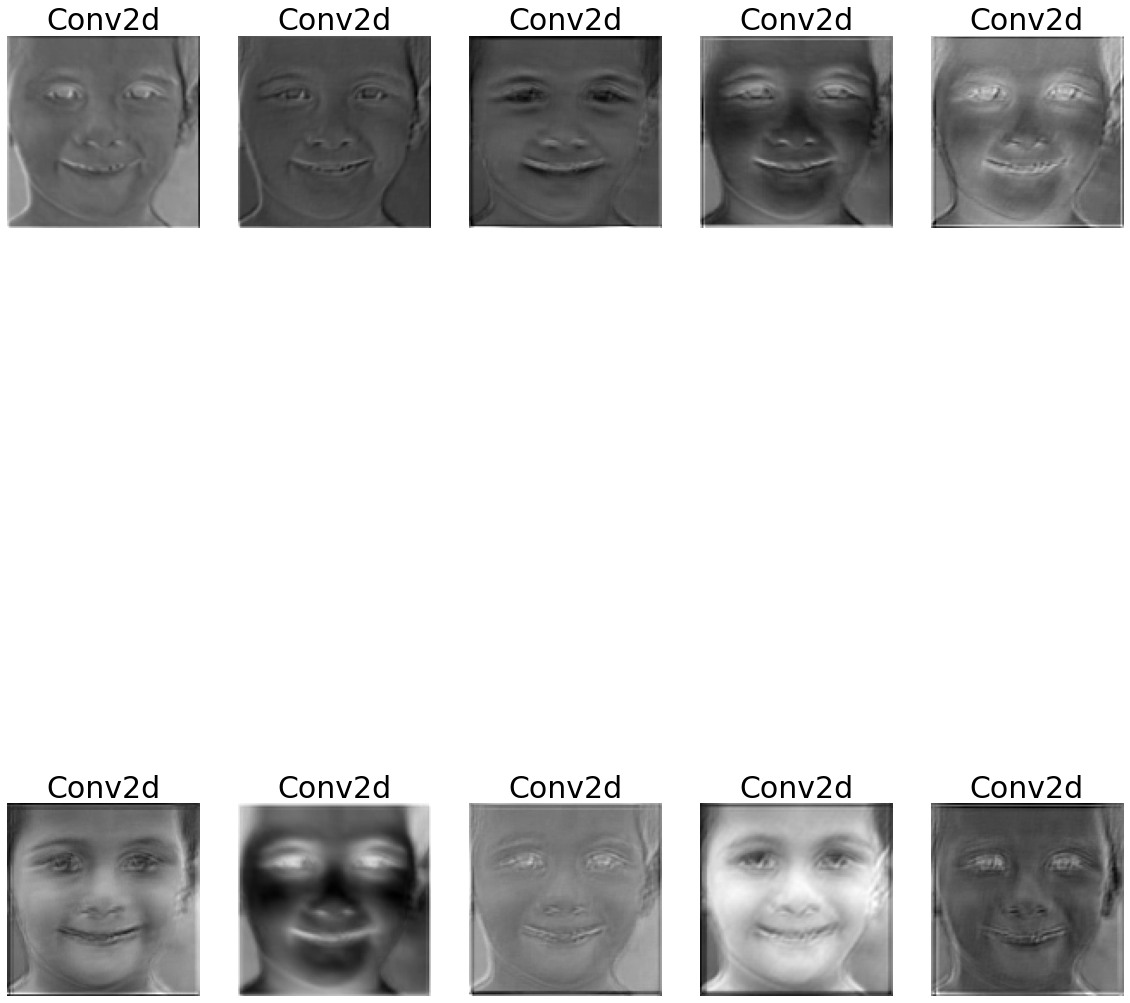

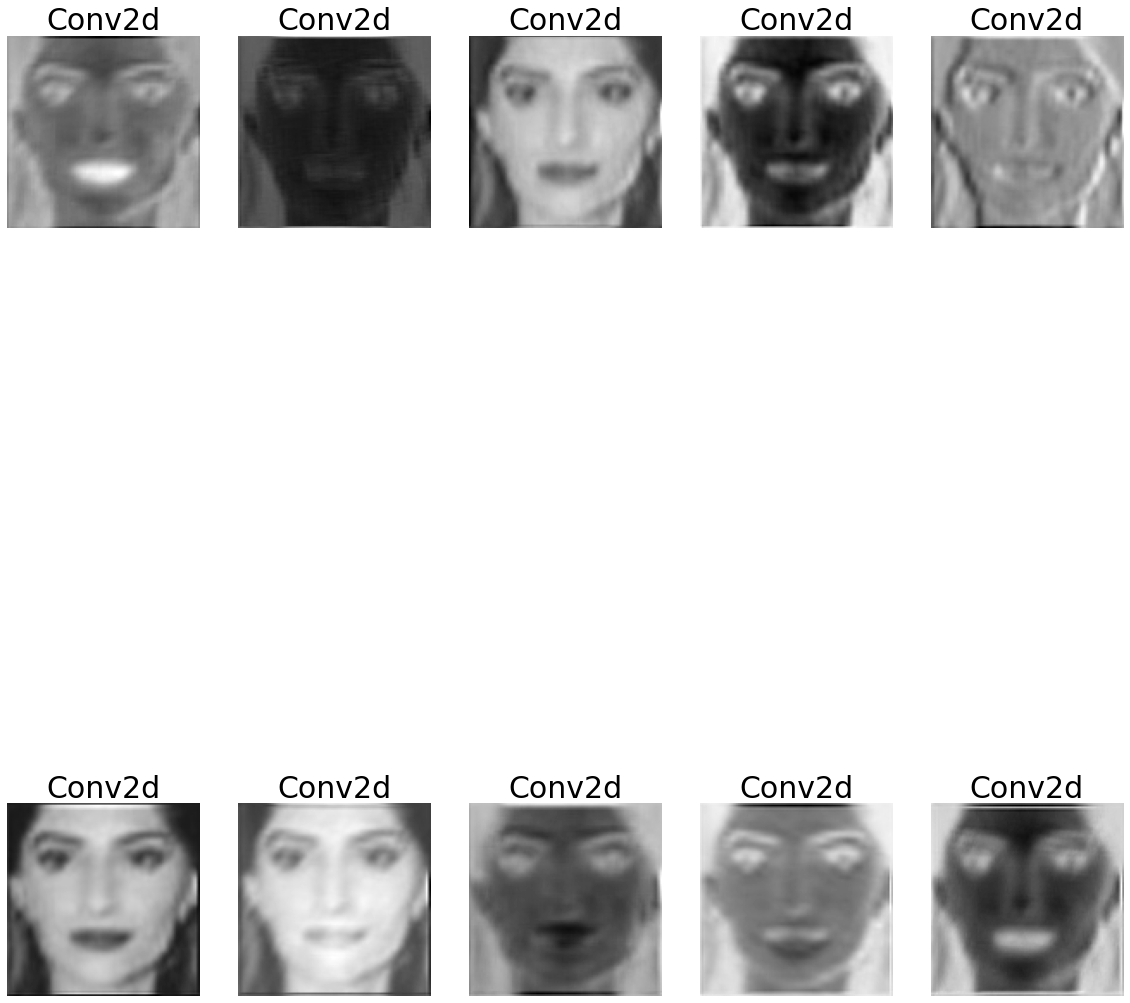

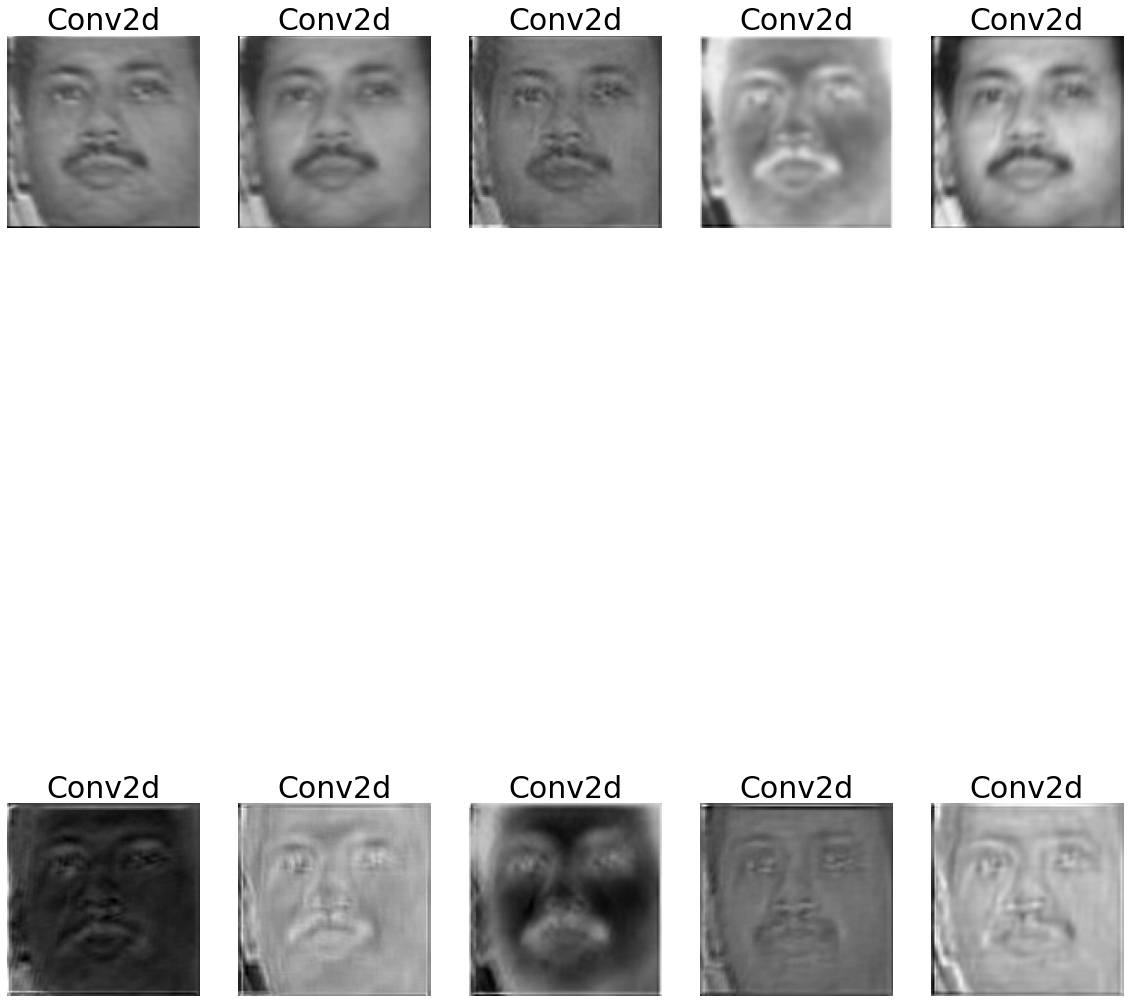

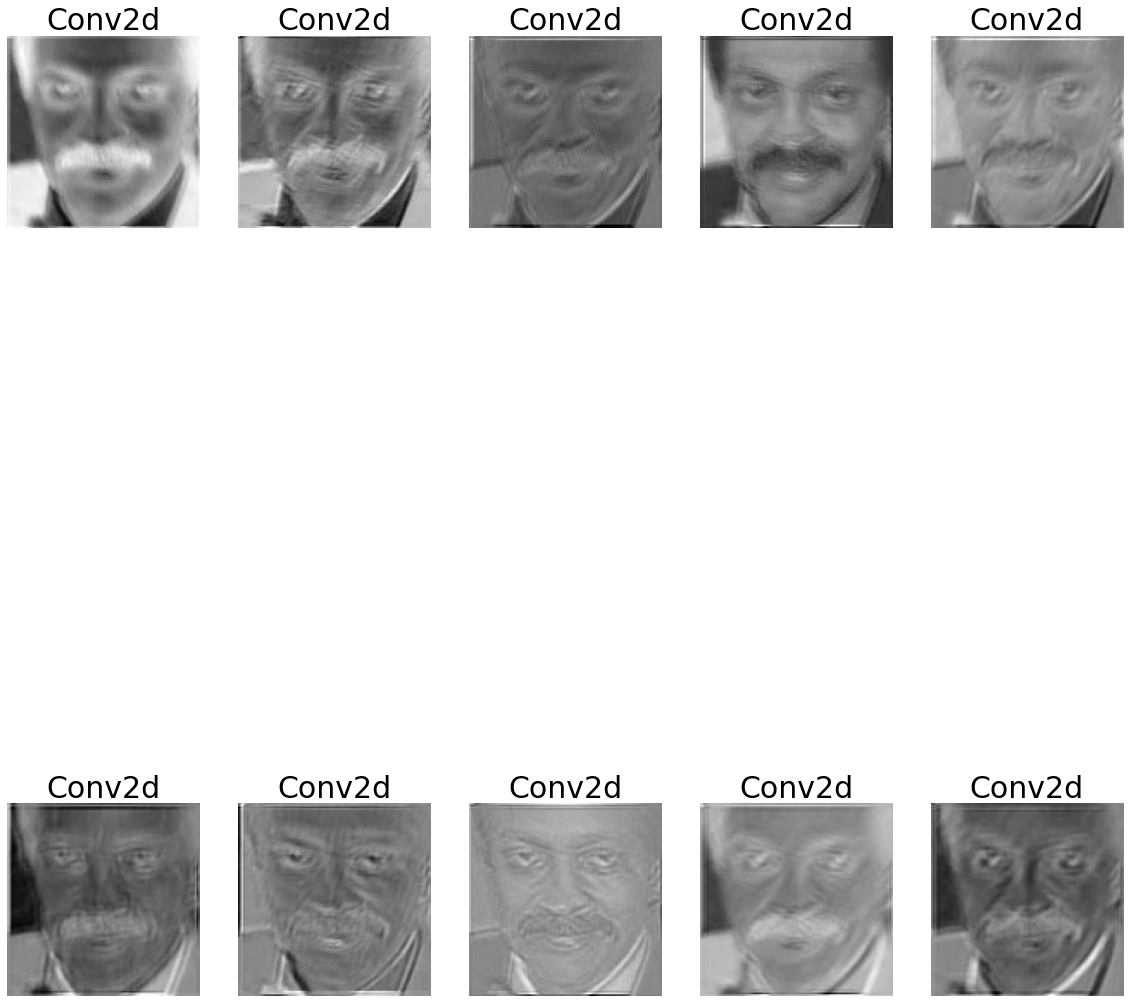

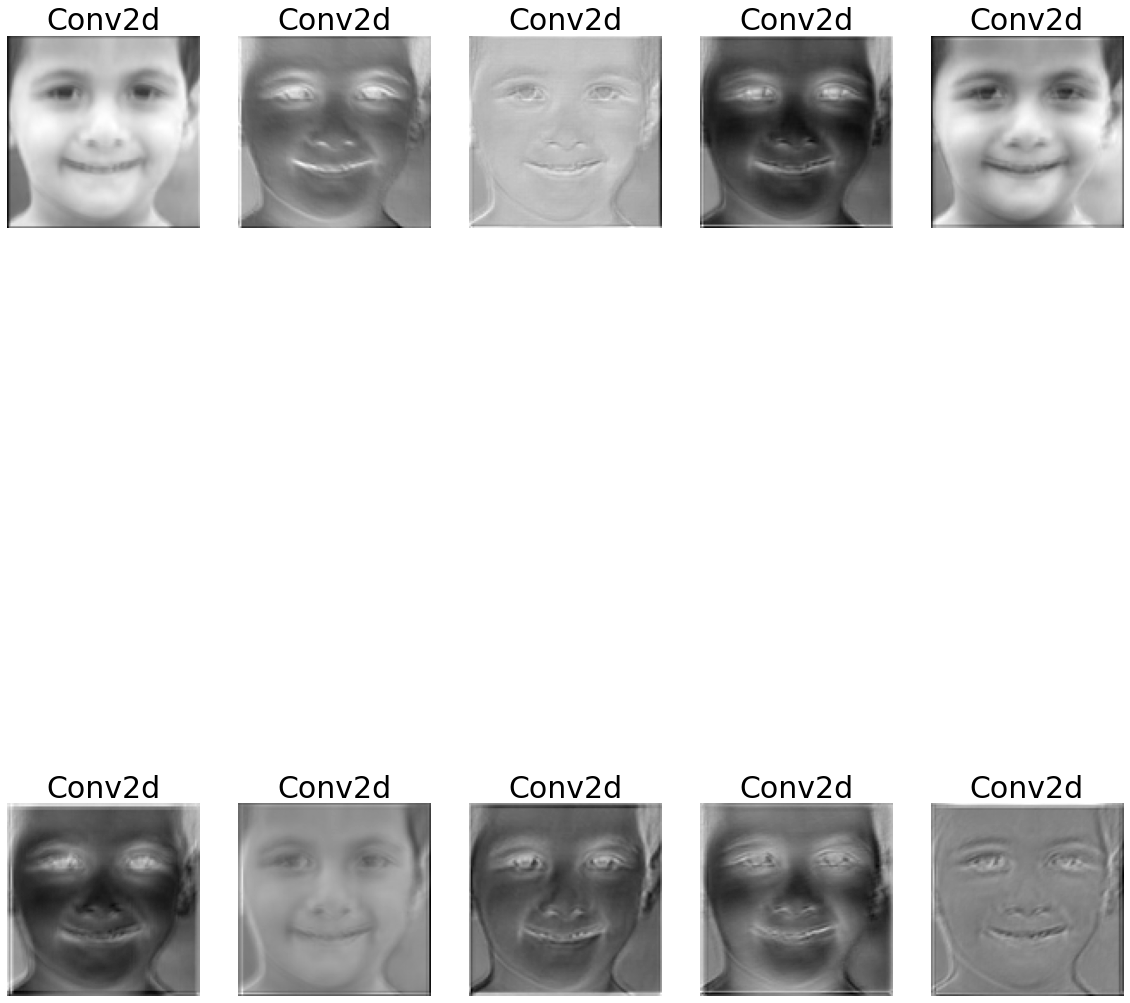

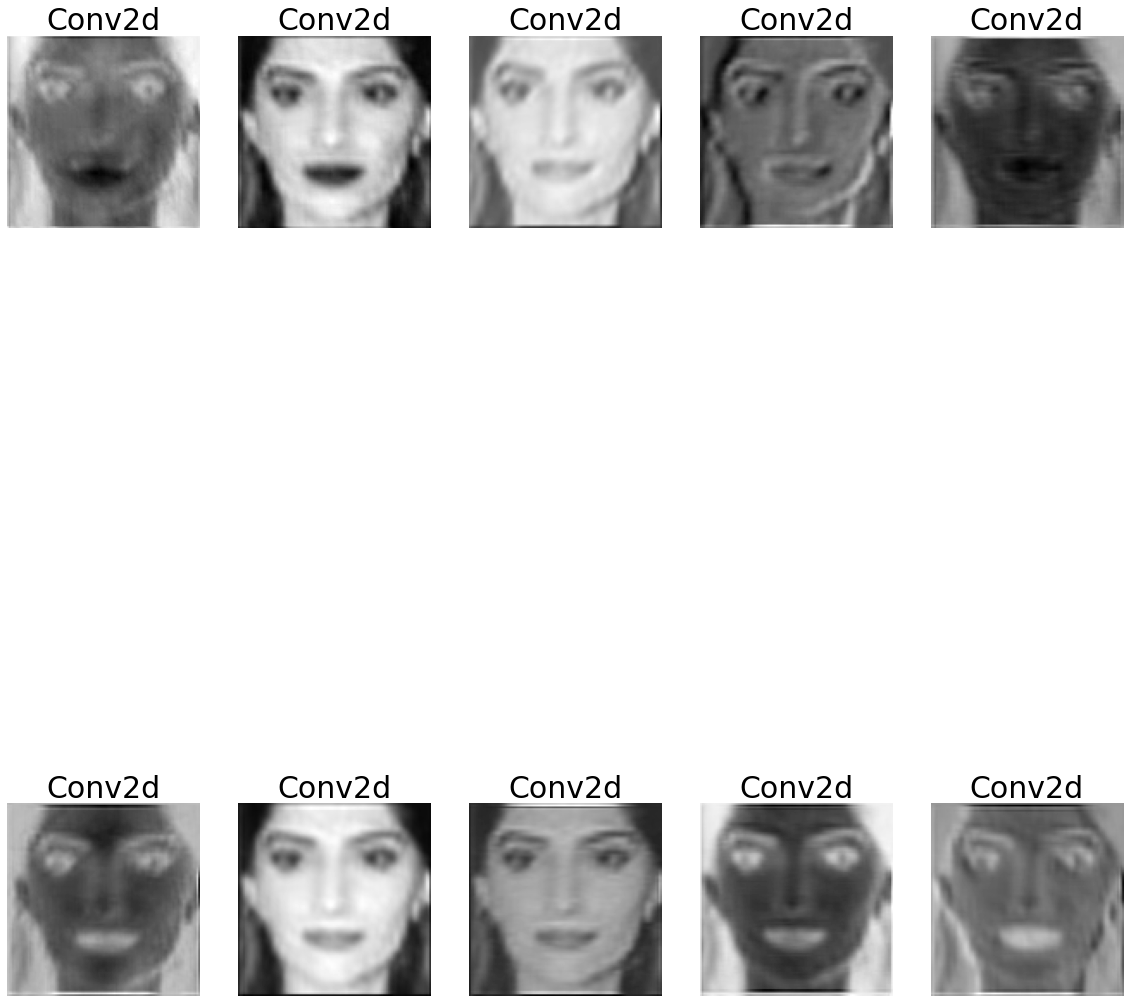

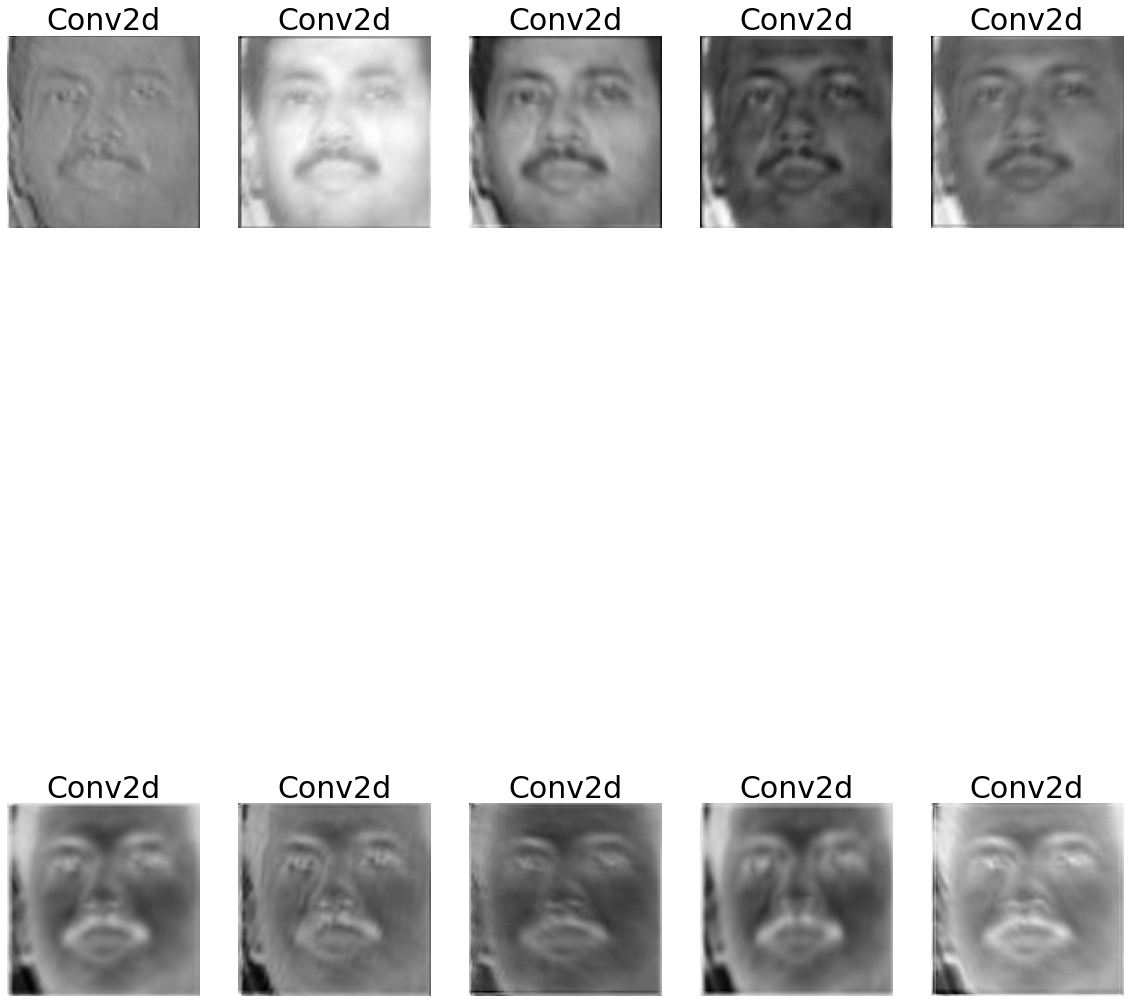

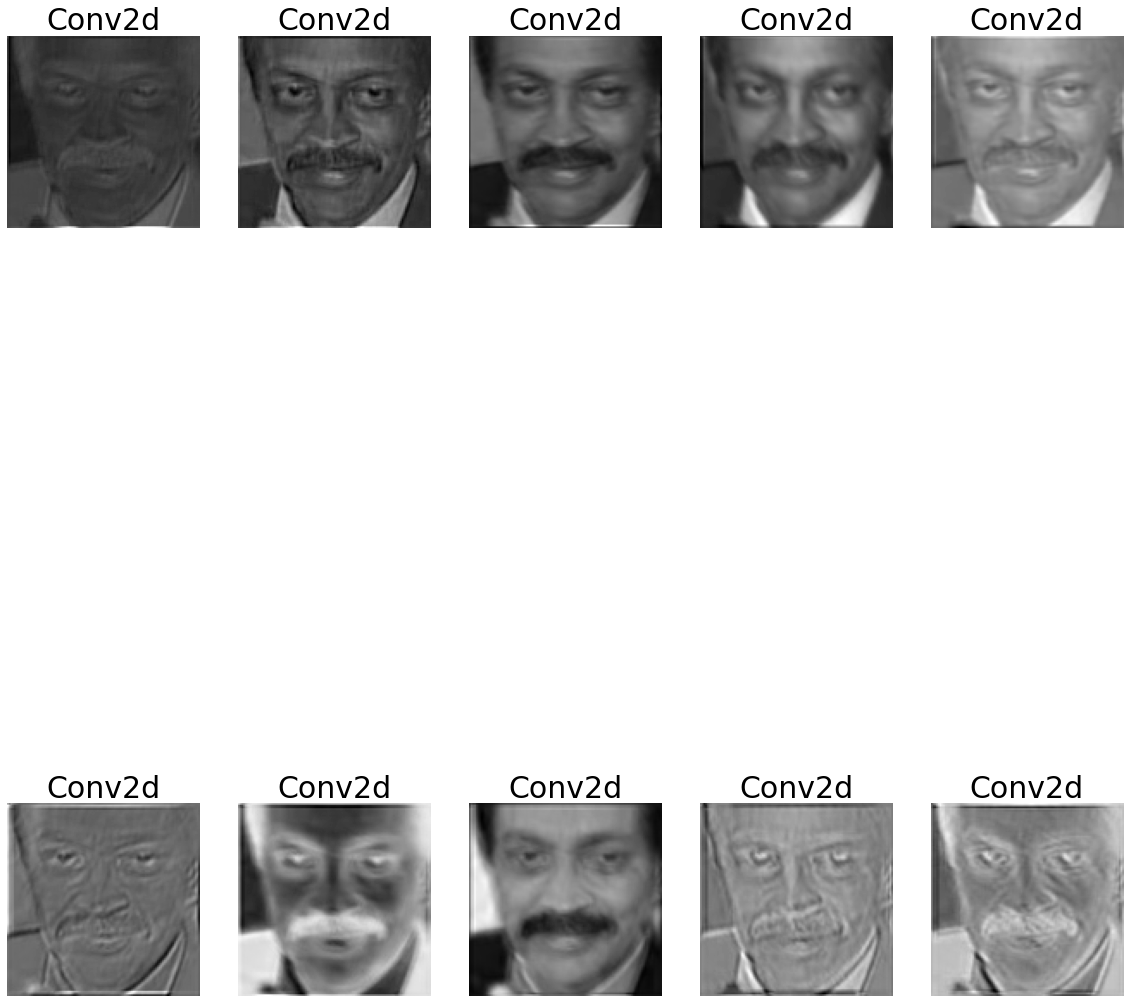

In [ ]:
# # Images for race 3
# race0_imgs = getImages("3", [0, 2, 4, 6])
# createVisualizationForImages(race0_imgs, "VGG16")
# createVisualizationForImages(race0_imgs, "resnet101")